In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\BIA Projects\BIA-main\BIA Project & Practise\Project & Data\Diwali Sales\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding ='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [8]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [9]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
df['Amount'] = df['Amount'].astype(int)        #changing datatype from float to int

In [13]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
df[['Age','Orders','Amount']].describe()                    #using describe fro specific columns

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


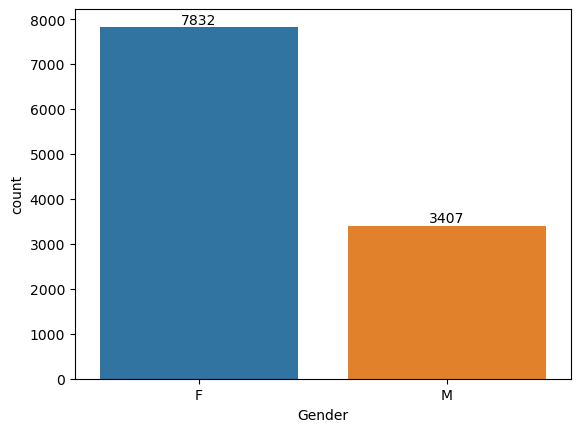

In [15]:
ax = sns.countplot(x='Gender', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

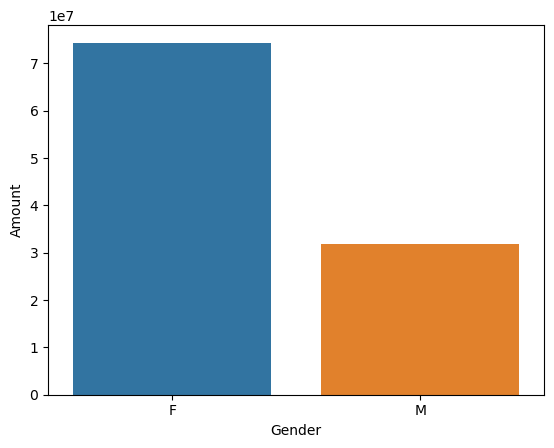

In [16]:
salesbygender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender',y='Amount', data = salesbygender);

Observation - Female buyers more than male buyers.

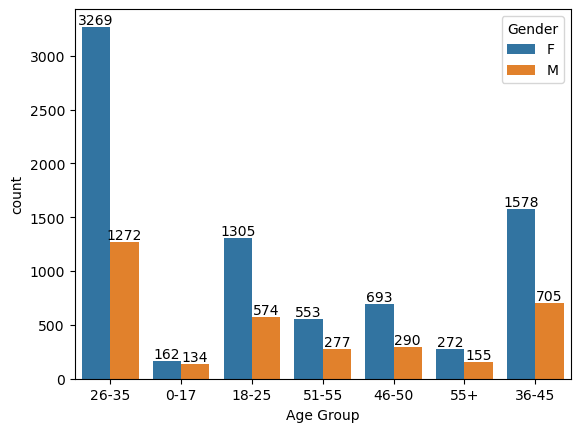

In [17]:
ax = sns.countplot(data = df, x='Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

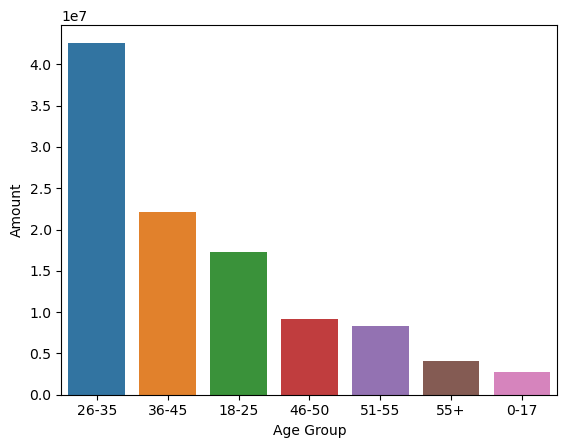

In [18]:
salesbyage = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = salesbyage);

Observation - Most of the female buyers are of the age group from 26-35 years.

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

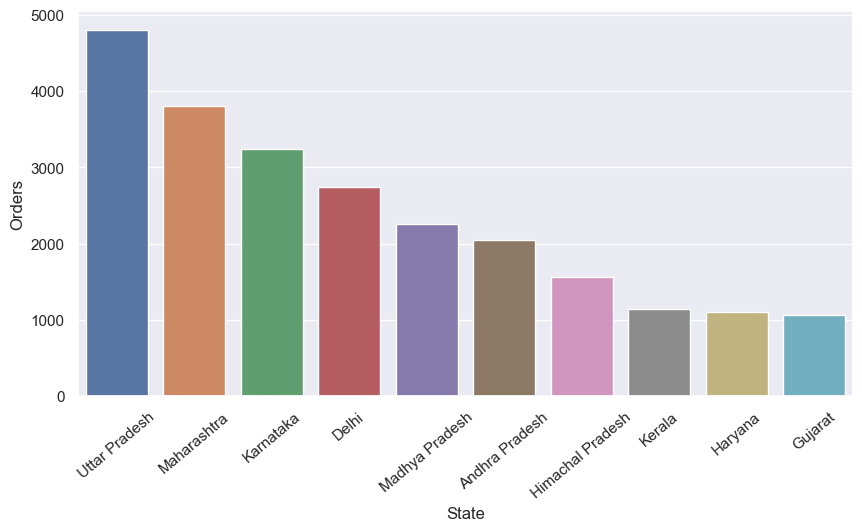

In [20]:
salesbystate = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=salesbystate, x='State', y='Orders')
plt.xticks(rotation=40);

Observation - The highest orders are from Uttar Pradesh and the lowest orders ar from Gujarat.

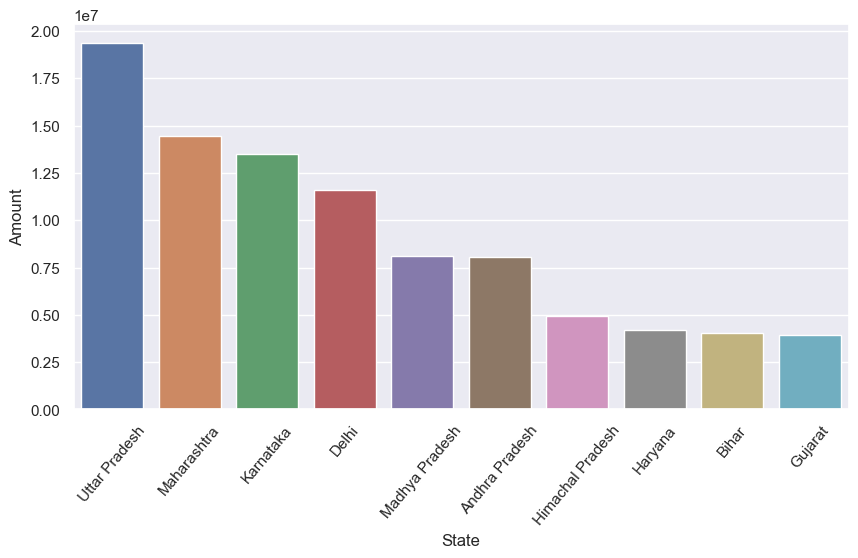

In [25]:
salesbystate = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=salesbystate, x='State', y='Amount')
plt.xticks(rotation=50);

Observation - The highest orders and sales are from Uttar Pradesh and the lowest orders are from Gujarat

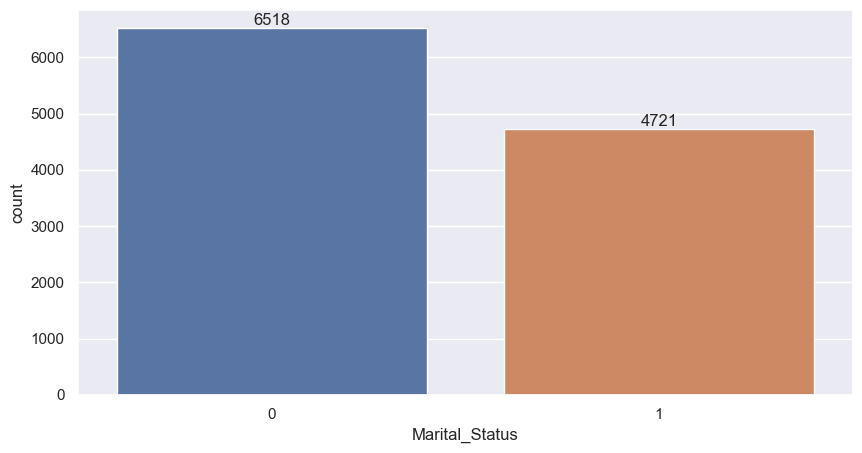

In [32]:
ax = sns.countplot(data=df, x = 'Marital_Status')

sns.set(rc={'figure.figsize': (5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

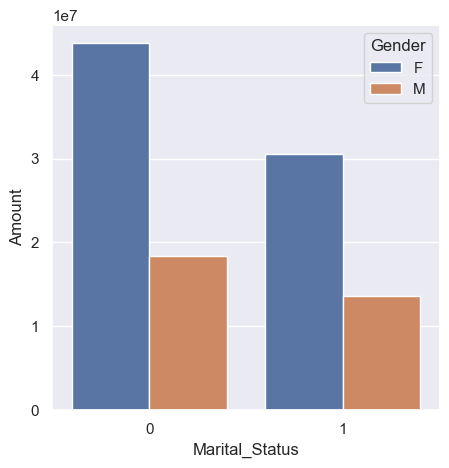

In [36]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender');

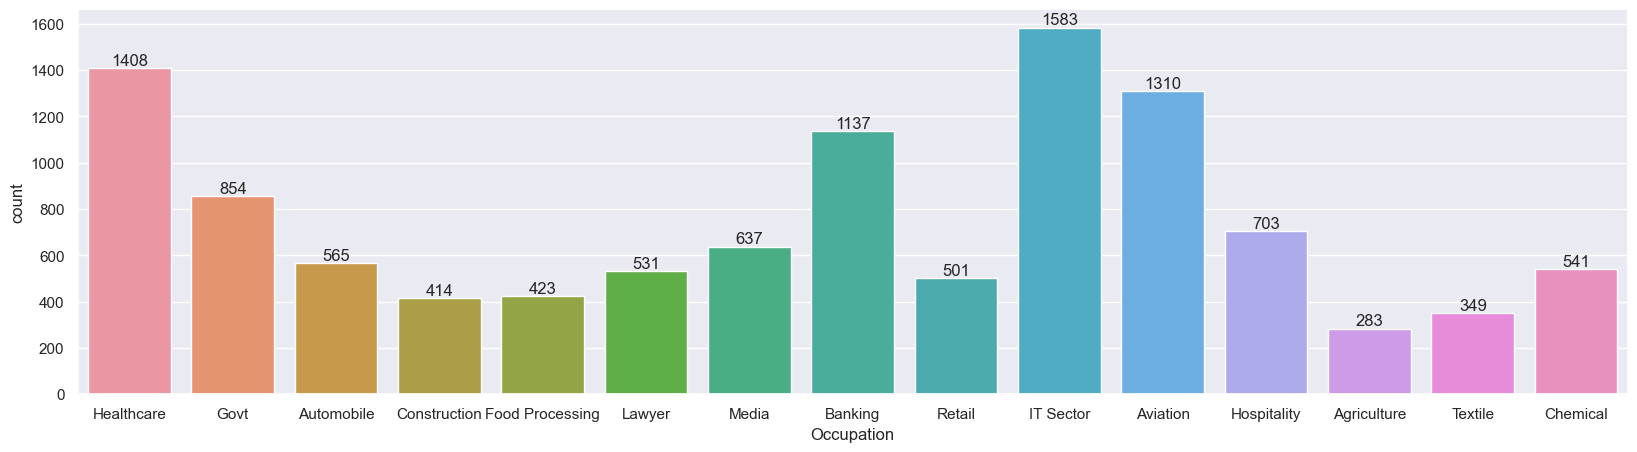

In [47]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=df, x='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

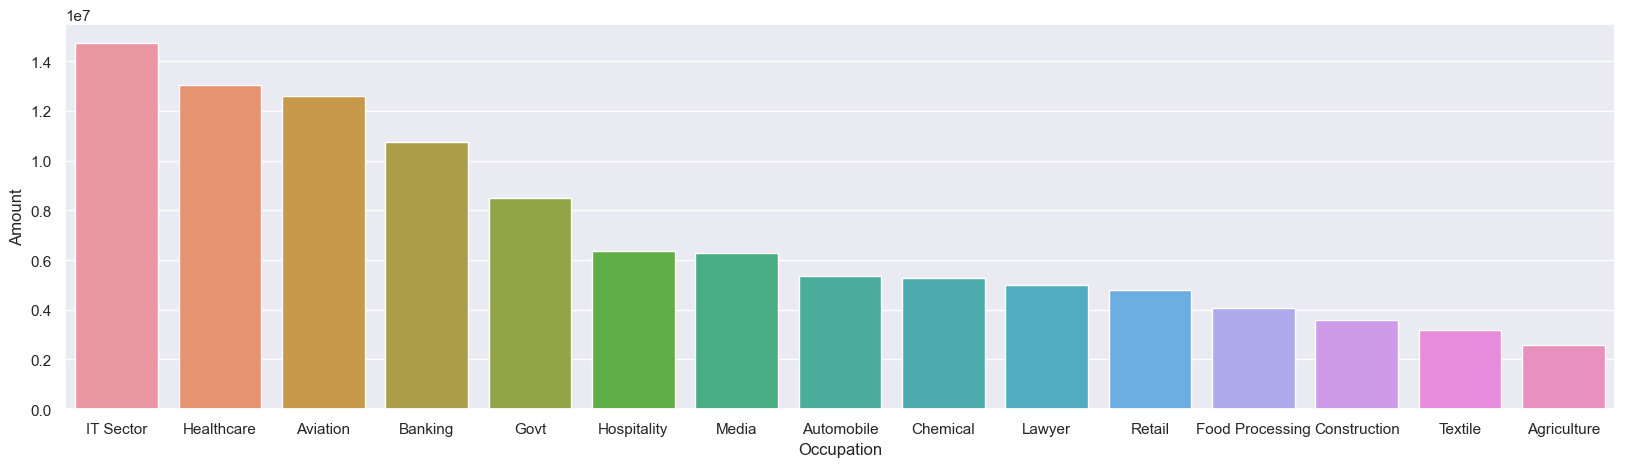

In [46]:
sales_state = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Occupation', y='Amount')

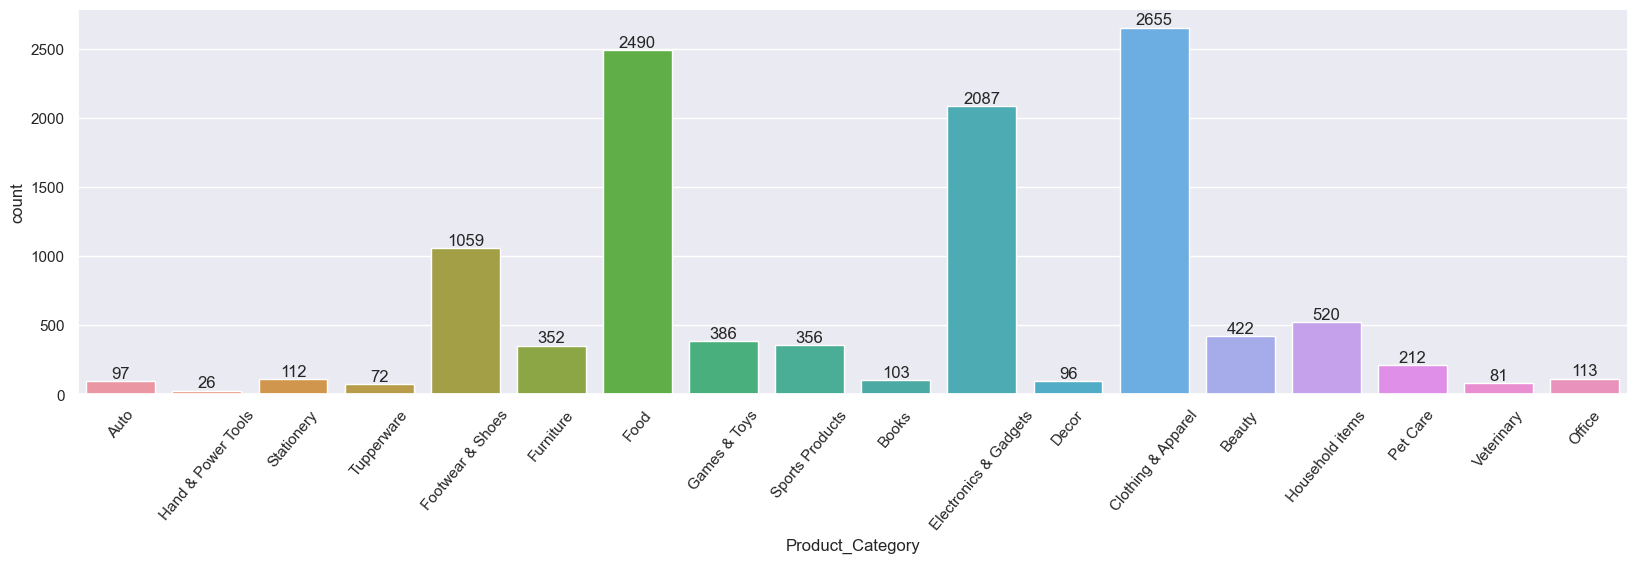

In [52]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=df, x='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xticks(rotation=50);

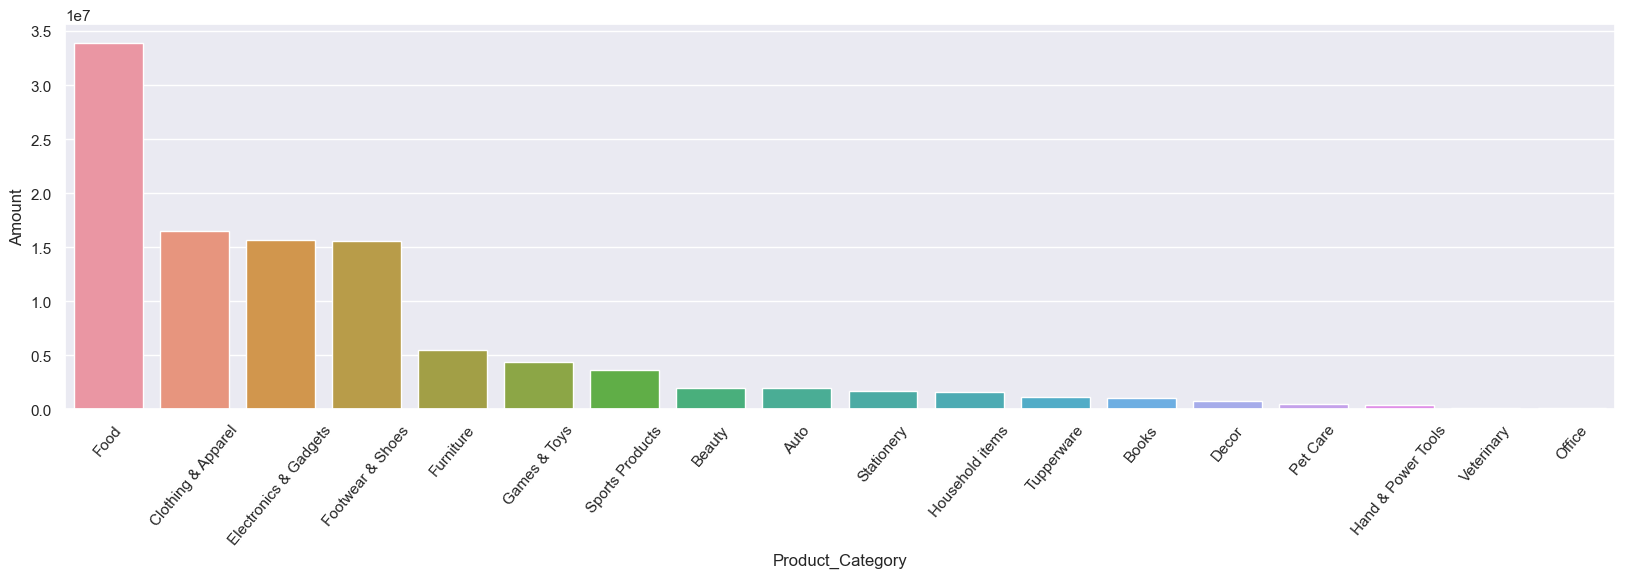

In [57]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Product_Category', y='Amount');
plt.xticks(rotation=50);

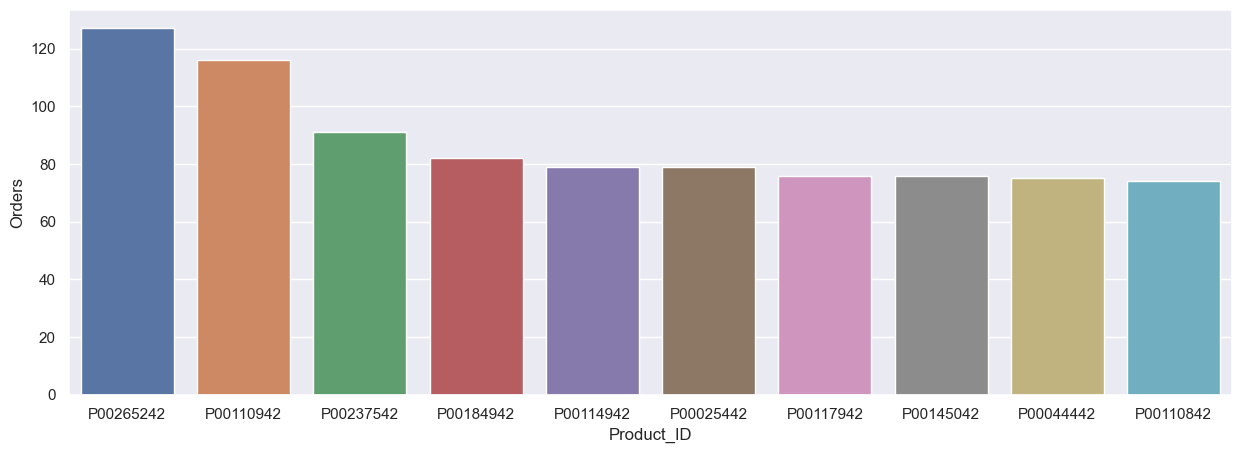

In [61]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='Product_ID', y='Orders');

Conclusion - Married women age group 26-35 years from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are of more likely to buy products from Food, Clothing and Electonics Category.